In [1]:
#Torch Modules
import torch
import torchvision
import torch.nn as nn
from torchvision.datasets import VOCDetection
from torchvision import ops
import torch.utils as tu
from torchvision import transforms
from torch.nn.utils.rnn import pad_sequence

#Other modules
import os, random
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET

#Image processing modules
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from model_utils.pascal_loader import VOCDetDataset, getClassDicts

In [2]:
#vocDataset = VOCDetection('./temp_im/', year='2007', image_set='test', download=True)

In [3]:
train_img_path = '../Data/VOC2007_TEST/JPEGImages/'
train_ann_path = '../Data/VOC2007_TEST/Annotations/'

In [4]:
voc_train_dataset = VOCDetDataset(train_img_path, train_ann_path, getClassDicts()[0], (256, 256,3))

In [5]:
voc_train_loader = tu.data.DataLoader(voc_train_dataset, batch_size=16, shuffle=True)

In [6]:
for img_batch, bboxes_batch, classes_batch in voc_train_loader:
    img_data = img_batch
    bboxes_data = bboxes_batch
    classes_data = classes_batch
    break

# Testing Area

In [9]:
from one_stage_detector import OneStageDetector
import time

In [ ]:
osd = OneStageDetector()

In [26]:
time_ = time.time()

In [27]:
bb = BackboneNetwork()

In [28]:
empImg = torch.empty((3,256,256))

In [29]:
bb(empImg).shape

torch.Size([512, 16, 16])

In [30]:
out = bb(img_data)

In [31]:
rpn = RegionProposalNetwork((16,16), (256,256), 512)

In [32]:
loss, props, gt_classes, poss = rpn(out, bboxes_data, classes_data)

In [33]:
time.time() - time_

14.474719762802124

In [34]:
loss

tensor(3871.6960, grad_fn=<AddBackward0>)

In [139]:
props_, confs_ = rpn.inference(out)

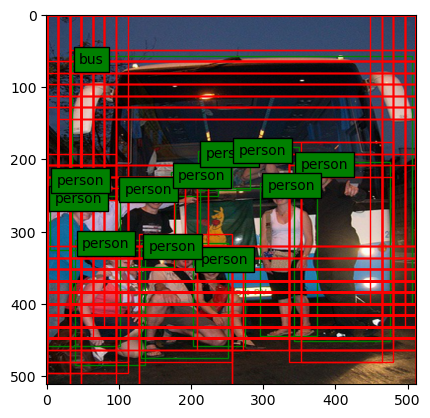

In [69]:
displayImg(img_data,bboxes_data, classes_data, idx2cls, 0, True, anc_gen, 0.7)

In [1]:
from AnchorGen import AnchorGenerator

In [2]:
import numpy as np
import torch

In [3]:
ac = AnchorGenerator(stride=3)

In [4]:
fm_w, fm_h = (32,32)

In [5]:
out = ac((32,32), 2)

In [6]:
out.shape

torch.Size([2, 6952, 4])

In [9]:
a0 = a[0]

In [15]:
a0[np.all(a0 >= 0, axis=1)]

array([[ 2.5,  2. ,  3.5,  4. ],
       [ 2. ,  2. ,  4. ,  4. ],
       [ 1.5,  2. ,  4.5,  4. ],
       ...,
       [30.5, 29. , 33.5, 35. ],
       [29. , 29. , 35. , 35. ],
       [27.5, 29. , 36.5, 35. ]])

In [16]:
a0[...,[0,2]]

array([[ 2.5,  3.5],
       [ 2. ,  4. ],
       [ 1.5,  4.5],
       ...,
       [30.5, 33.5],
       [29. , 35. ],
       [27.5, 36.5]])

In [7]:
out1 = out[(out >= 0).all(axis=2)]

In [8]:
out1 = out1[(out1[...,[0,2]] <= 32).all(axis=1)]

In [9]:
out1 = out1[(out1[...,[1,3]] <= 32).all(axis=1)]

In [10]:
out1.shape

torch.Size([6952, 4])

In [11]:
out1

tensor([[ 2.5000,  2.0000,  3.5000,  4.0000],
        [ 2.0000,  2.0000,  4.0000,  4.0000],
        [ 1.5000,  2.0000,  4.5000,  4.0000],
        ...,
        [30.0000, 28.0000, 32.0000, 32.0000],
        [30.5000, 30.0000, 31.5000, 32.0000],
        [30.0000, 30.0000, 32.0000, 32.0000]], dtype=torch.float64)

In [47]:
out1

tensor([[ 0.5000,  0.0000,  1.5000,  2.0000],
        [ 0.0000,  0.0000,  2.0000,  2.0000],
        [ 0.5000,  1.0000,  1.5000,  3.0000],
        ...,
        [30.0000, 28.0000, 32.0000, 32.0000],
        [30.5000, 30.0000, 31.5000, 32.0000],
        [30.0000, 30.0000, 32.0000, 32.0000]], dtype=torch.float64)

In [13]:
a = [1,3,4,5,67,4,11]

In [14]:
a < 10

TypeError: '<' not supported between instances of 'list' and 'int'